The "Top 10000 Spotify Songs - ARIA and Billboard Charts" is a comprehensive collection of 10,000 of the most popular songs that have dominated the music scene from 1960 to the present day. This dataset was curated based on rankings from both the ARIA (Australian Recording Industry Association) and Billboard charts, ensuring a diverse representation of songs that have achieved immense commercial success and cultural significance.



In [ ]:
#importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


Columns in this dataset desribes
Track URI represents the track,
Track name,
Artist URI,
Artist name,
Album URI,
Album Name,
Album Artist URI,
Album release date,
Album Image URL.



In [ ]:
#Reading the file
df = pd.read_csv('/content/Top10000.csv')
df.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346b...,...,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,NaN,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic..."
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73a...,...,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,NaN,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son..."
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1999-01-12,https://i.scdn.co/image/ab67616d0000b2738e4986...,...,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,NaN,Jive,P (P) 1999 Zomba Recording LLC
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. On...",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,2014-10-20,https://i.scdn.co/image/ab67616d0000b2731e7c53...,...,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,NaN,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C..."
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,spotify:album:0c78nsgqX6VfniSNWIxwoD,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,1969-12-05,https://i.scdn.co/image/ab67616d0000b27373d927...,...,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,NaN,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ..."


In [ ]:
df.shape


(8378, 35)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             8378 non-null   object 
 1   Track Name            8377 non-null   object 
 2   Artist URI(s)         8376 non-null   object 
 3   Artist Name(s)        8377 non-null   object 
 4   Album URI             8376 non-null   object 
 5   Album Name            8377 non-null   object 
 6   Album Artist URI(s)   8376 non-null   object 
 7   Album Artist Name(s)  8376 non-null   object 
 8   Album Release Date    8375 non-null   object 
 9   Album Image URL       8373 non-null   object 
 10  Disc Number           8377 non-null   float64
 11  Track Number          8377 non-null   float64
 12  Track Duration (ms)   8377 non-null   float64
 13  Track Preview URL     5957 non-null   object 
 14  Explicit              8377 non-null   object 
 15  Popularity           

In [ ]:
# Basic statistics of numeric columns
numeric_stats = df.describe()
numeric_stats


,Disc Number,Track Number,Track Duration (ms),Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres
count,8377.000000,8377.000000,8.377000e+03,8377.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,0.0
mean,1.035335,4.976483,2.246889e+05,37.470216,0.608099,0.682866,5.163701,-7.275960,0.700179,0.065217,0.210855,0.028647,0.185229,0.586805,121.416524,3.959403,NaN
std,0.338817,5.541180,5.469542e+04,29.351098,0.146574,0.191920,3.582568,3.302473,0.458207,0.061168,0.251330,0.122547,0.148614,0.238932,26.310599,0.254456,NaN
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000020,0.000000,-29.368000,0.000000,0.000000,0.000006,0.000000,0.016500,0.000000,0.000000,0.000000,NaN
25%,1.000000,1.000000,1.922750e+05,0.000000,0.514000,0.559000,2.000000,-9.073000,0.000000,0.033200,0.018200,0.000000,0.089000,0.400000,102.277000,4.000000,NaN
50%,1.000000,3.000000,2.197330e+05,42.000000,0.618000,0.712000,5.000000,-6.517000,1.000000,0.043200,0.095100,0.000006,0.127000,0.598000,120.471000,4.000000,NaN
75%,1.000000,7.000000,2.504000e+05,64.000000,0.711000,0.836000,8.000000,-4.895000,1.000000,0.067750,0.323000,0.000535,0.245000,0.786000,134.492000,4.000000,NaN
max,15.000000,93.000000,1.561133e+06,98.000000,0.988000,0.997000,11.000000,2.769000,1.000000,0.711000,0.991000,0.985000,0.989000,0.995000,217.913000,5.000000,NaN


In [ ]:
# Columns with missing values and their counts
missing_values = df.isnull().sum()
print(missing_values)

Track URI                  0
Track Name                 1
Artist URI(s)              2
Artist Name(s)             1
Album URI                  2
Album Name                 1
Album Artist URI(s)        2
Album Artist Name(s)       2
Album Release Date         3
Album Image URL            5
Disc Number                1
Track Number               1
Track Duration (ms)        1
Track Preview URL       2421
Explicit                   1
Popularity                 1
ISRC                       4
Added By                   1
Added At                   1
Artist Genres            474
Danceability               3
Energy                     3
Key                        3
Loudness                   3
Mode                       3
Speechiness                3
Acousticness               3
Instrumentalness           3
Liveness                   3
Valence                    3
Tempo                      3
Time Signature             3
Album Genres            8378
Label                      7
Copyrights    

In [ ]:
# Finding duplicate rows
duplicate_rows = df[df.duplicated(keep='first')]

# Number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

# Displaying the duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")
duplicate_rows

Number of duplicate rows: 40


,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
248,spotify:track:4DhbiXEuV7JxSR0wuqetTa,Free Ride,spotify:artist:7j9PMegEgVN1fNp8NZXNCI,The Edgar Winter Group,spotify:album:4CNEJF5wYGqhOYEKq8ciu8,They Only Come Out At Night,spotify:artist:3UNrI3SG1l2ezKikxQ2zuk,Edgar Winter,1972-11-30,https://i.scdn.co/image/ab67616d0000b27309a018...,...,0.0597,0.290000,0.003220,0.1890,0.814,124.204,4.0,NaN,Epic,P (P) 1972 SONY BMG MUSIC ENTERTAINMENT
1096,spotify:track:4vp2J1l5RD4gMZwGFLfRAu,I Gotta Feeling,spotify:artist:1yxSLGMDHlW21z4YXirZDS,Black Eyed Peas,spotify:album:36fdxiOzdlmsrHgGcfvqUJ,THE E.N.D. (THE ENERGY NEVER DIES),spotify:artist:1yxSLGMDHlW21z4YXirZDS,Black Eyed Peas,2009-01-01,https://i.scdn.co/image/ab67616d0000b273f051a3...,...,0.0265,0.087300,0.000000,0.5090,0.610,127.960,4.0,NaN,Interscope,"C © 2009 Interscope, P ℗ 2009 Interscope"
1493,spotify:track:2dCmGcEOQrMQhMMS8Vj7Ca,Super Freak,spotify:artist:0FrpdcVlJQqibaz5HfBUrL,Rick James,spotify:album:2DBFUBBqJQvfXpodPi2WP5,Street Songs (Deluxe Edition),spotify:artist:0FrpdcVlJQqibaz5HfBUrL,Rick James,1981-04-07,https://i.scdn.co/image/ab67616d0000b27317f9e7...,...,0.0531,0.220000,0.000000,0.0575,0.962,132.446,4.0,NaN,Motown,"C © 1981 Motown Records, a Division of UMG Rec..."
1582,spotify:track:7Dm3dV3WPNdTgxoNY7YFnc,The Chain - 2004 Remaster,spotify:artist:08GQAI4eElDnROBrJRGE0X,Fleetwood Mac,spotify:album:1bt6q2SruMsBtcerNVtpZB,Rumours,spotify:artist:08GQAI4eElDnROBrJRGE0X,Fleetwood Mac,1977-02-04,https://i.scdn.co/image/ab67616d0000b27357df7c...,...,0.0524,0.051700,0.000066,0.0781,0.637,151.796,4.0,NaN,Rhino/Warner Records,"C © 2004 Warner Records Inc., P ℗ 2004 Warner ..."
2123,spotify:track:5eYwDBLucWfWI5KsV7oYX2,Mary Jane's Last Dance,spotify:artist:4tX2TplrkIP4v05BNC903e,Tom Petty and the Heartbreakers,spotify:album:7ait6chB3O3C1fMGUDJhtu,Anthology: Through The Years,spotify:artist:4tX2TplrkIP4v05BNC903e,Tom Petty and the Heartbreakers,2000-01-01,https://i.scdn.co/image/ab67616d0000b2736cfd76...,...,0.1400,0.038300,0.000001,0.2660,0.516,170.020,4.0,NaN,Interscope,"C © 2000 Universal Music Enterprises, a Divisi..."
2260,spotify:track:1LeWIs2hP2r5yOQnVuYoI5,Ain't No Mountain High Enough,"spotify:artist:3koiLjNrgRTNbOwViDipeA, spotify...","Marvin Gaye, Tammi Terrell",spotify:album:67Eq3nfl1km9s5ig76Cc8B,United,"spotify:artist:3koiLjNrgRTNbOwViDipeA, spotify...","Marvin Gaye, Tammi Terrell",1967-08-29,https://i.scdn.co/image/ab67616d0000b27396e0b7...,...,0.0320,0.430000,0.000000,0.1840,0.800,129.991,4.0,NaN,Motown (Capitol),"C © 1967 Motown Records, a Division of UMG Rec..."
2524,spotify:track:0PGwM5vdr5fMejx0IIAYXj,I Want You Back,spotify:artist:2iE18Oxc8YSumAU232n4rW,The Jackson 5,spotify:album:2oJRp9GV4zpFzpnneGZqZH,20th Century Masters: The Millennium Collectio...,spotify:artist:2iE18Oxc8YSumAU232n4rW,The Jackson 5,1999-01-01,https://i.scdn.co/image/ab67616d0000b273ea76a3...,...,0.0318,0.466000,0.001950,0.1870,0.960,98.293,4.0,NaN,Motown,"C © 1999 Motown Record Company L.P., P This Co..."
2623,spotify:track:39C5FuZ8C8M0QI8CrMsPkR,Foreplay / Long Time,spotify:artist:29kkCKKGXheHuoO829FxWK,Boston,spotify:album:2QLp07RO6anZHmtcKTEvSC,Boston,spotify:artist:29kkCKKGXheHuoO829FxWK,Boston,1976,https://i.scdn.co/image/ab67616d0000b27390ef97...,...,0.0545,0.009830,0.007480,0.0923,0.209,118.704,4.0,NaN,Epic/Legacy,"P (P) 1976, 2006 Epic Records, a division of S..."
2626,spotify:track:4aKIs5t9TqP59btlCGPrgw,Maneater,spotify:artist:77tT1kLj6mCWtFNqiOmP9H,Daryl Hall & John Oates,spotify:album:5nDQAU3K52JimAaShsZoSn,H2O,spotify:artist:77tT1kLj6mCWtFNqiOmP9H,Daryl Hall & John Oates,1982,https://i.scdn.co/image/ab67616d0000b273cb6fdb...,...,0.0398,0.035100,0.000044,0.0973,0.812,88.750,4.0,NaN,RCA/BMG Heritage,P This compilation (P) 2004 BMG Music
2691,spotify:track:6ztstiyZ

In [ ]:
# Remove duplicates and update the DataFrame
df.drop_duplicates(keep='first', inplace=True)


In [ ]:
# To calculate the mean popularity of songs with the same track name and artist name
aggregated_df = df.groupby(['Track Name', 'Artist Name(s)'])['Popularity'].mean().reset_index()
aggregated_df


,Track Name,Artist Name(s),Popularity
0,! (The Song Formerly Known As),Regurgitator,48.0
1,"""The Take Over, The Breaks Over""",Fall Out Boy,0.0
2,#Beautiful,"Mariah Carey, Miguel",23.5
3,#SELFIE,The Chainsmokers,0.0
4,#WHERESTHELOVE - Charity Single,"Black Eyed Peas, The World",0.0
...,...,...,...
7598,willow - dancing witch version (Elvira remix),"Taylor Swift, ELVIRA",64.0
7599,wish you were gay,Billie Eilish,0.0
7600,working,"Tate McRae, Khalid",65.0
7601,you broke me first,Tate McRae,85.0


In [ ]:
# Get the number of unique values in each column
unique_values_count = df.nunique()

unique_values_count


Track URI               8338
Track Name              7117
Artist URI(s)           3734
Artist Name(s)          3731
Album URI               6481
Album Name              5817
Album Artist URI(s)     3000
Album Artist Name(s)    2998
Album Release Date      3017
Album Image URL         6478
Disc Number                9
Track Number              54
Track Duration (ms)     6417
Track Preview URL       5810
Explicit                   2
Popularity                98
ISRC                    7632
Added By                   1
Added At                 499
Artist Genres           2551
Danceability             772
Energy                   864
Key                       12
Loudness                5632
Mode                       2
Speechiness             1041
Acousticness            2600
Instrumentalness        2754
Liveness                1306
Valence                  975
Tempo                   7377
Time Signature             5
Album Genres               0
Label                   1354
Copyrights    

Visualization

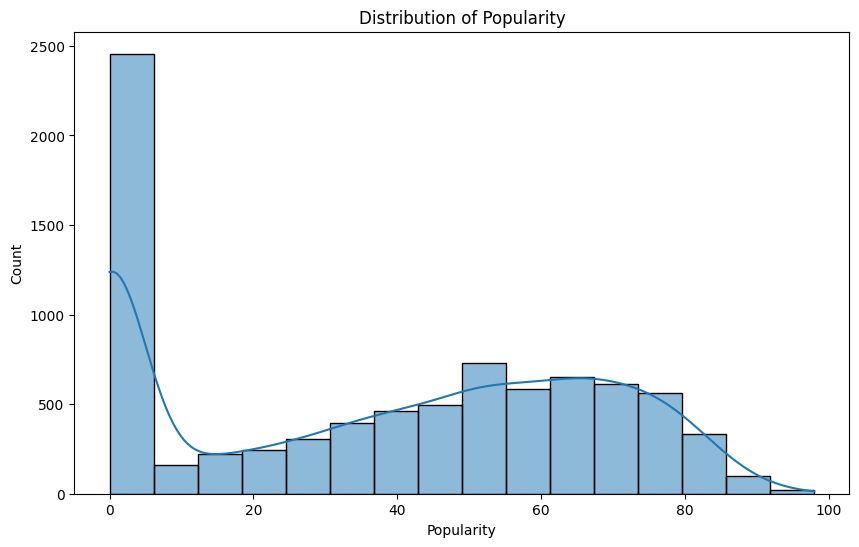

In [ ]:
# Distribution of Popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

<ipython-input-13-77ccceec0aae>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_boxplot['Release Year'].fillna('Unknown', inplace=True)


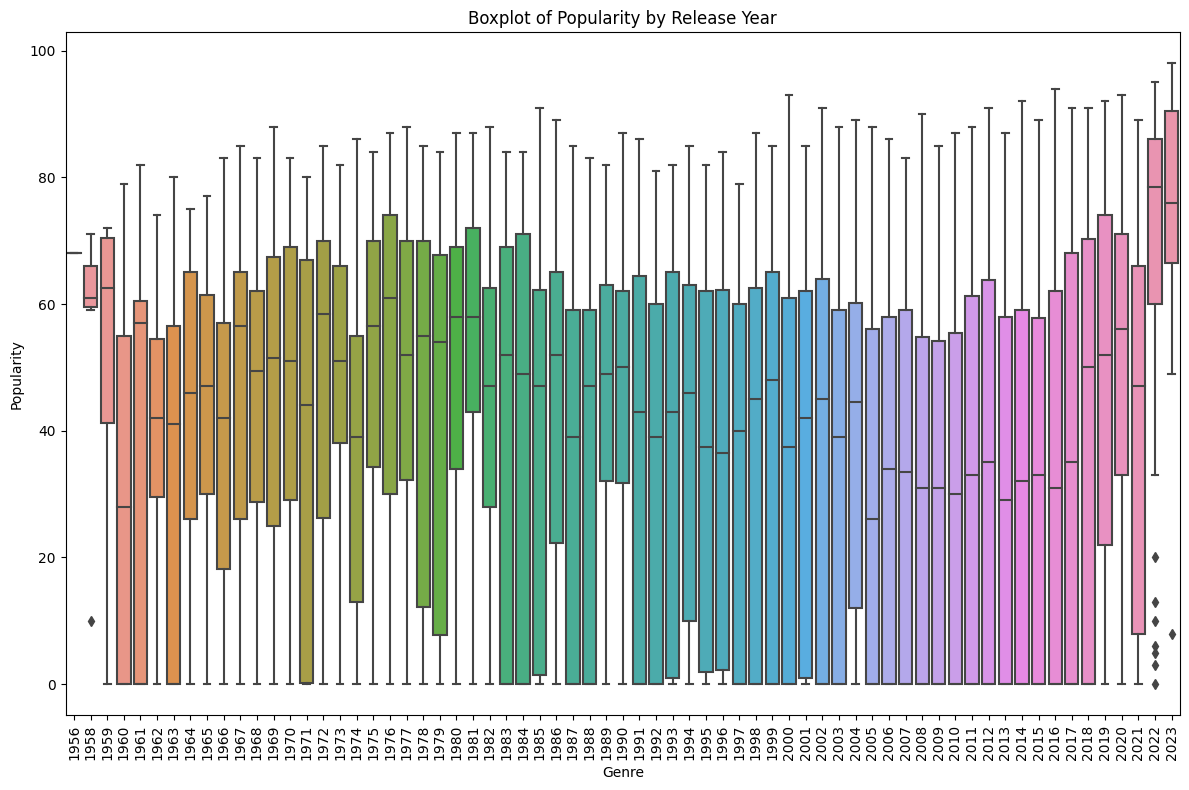

In [ ]:

# # Convert the 'Album Release Date' column to datetime
# Filter out rows with invalid dates in 'Album Release Date'
df['Album Release Date'] = pd.to_datetime(df['Album Release Date'], errors='coerce')

# Drop rows with invalid dates (NaT) from the DataFrame
df.dropna(subset=['Album Release Date'], inplace=True)

# Extract the year from the release date
df['Release Year'] = df['Album Release Date'].dt.year

# Selecting relevant columns for the plot: Release Year and Popularity
data_for_boxplot = df[['Release Year', 'Popularity']]

# Handle missing values in the 'Artist Genres' column
data_for_boxplot['Release Year'].fillna('Unknown', inplace=True)

# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_for_boxplot, x='Release Year', y='Popularity')
plt.xticks(rotation=90)
plt.title('Boxplot of Popularity by Release Year')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

<ipython-input-14-d39c57ebc4f5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


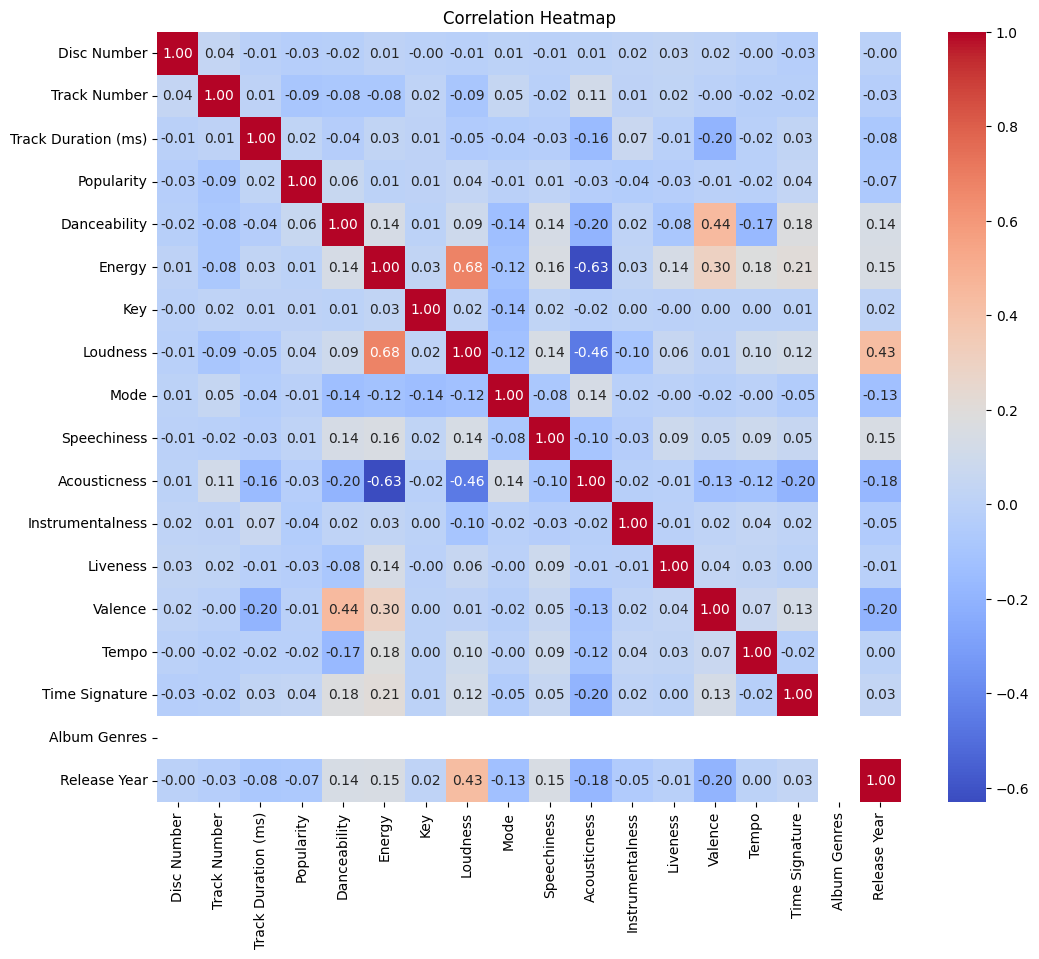

In [ ]:
# Correlation Heatmap for numeric columns
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

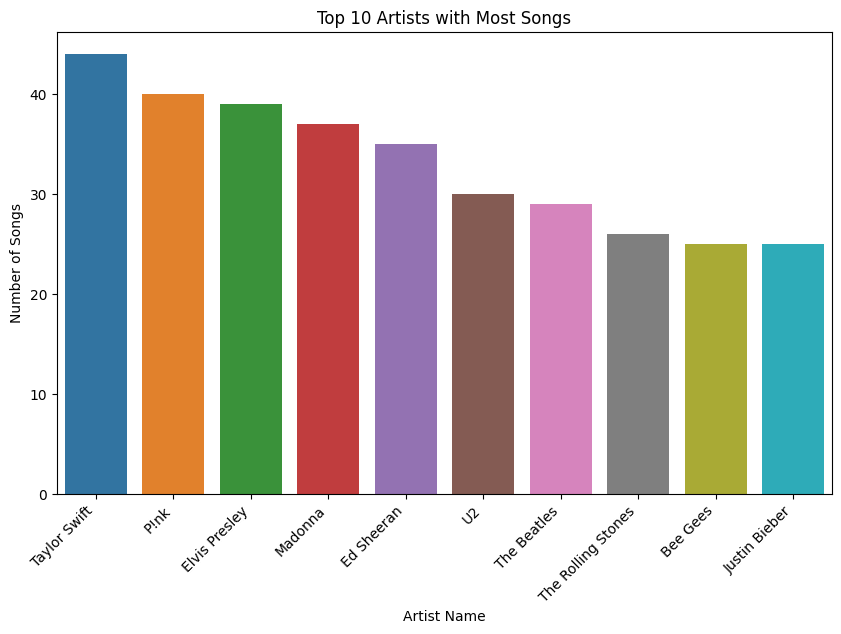

In [ ]:
# Top 10 artists with the most number of songs
top_artists = df['Artist Name(s)'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.index, y=top_artists.values)
plt.title('Top 10 Artists with Most Songs')
plt.xlabel('Artist Name')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Count of unique genres in the 'Artist Genres' column
artist_genres_count = df['Artist Genres'].nunique()
print(f"Number of unique artist genres: {artist_genres_count}")


Number of unique artist genres: 2551


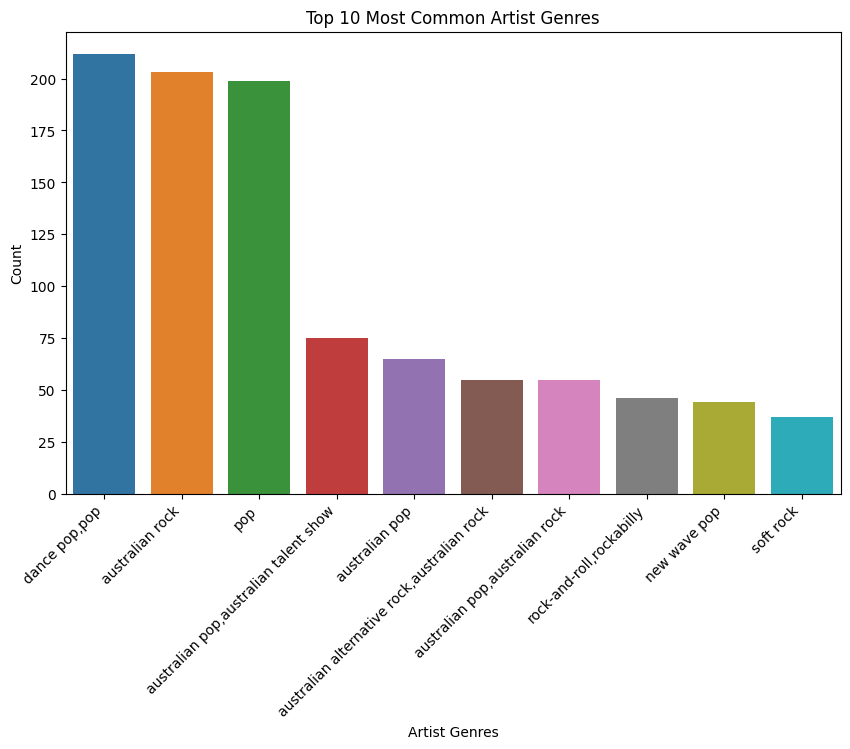

In [ ]:
# Top 10 most common artist genres
top_artist_genres = df['Artist Genres'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artist_genres.index, y=top_artist_genres.values)
plt.title('Top 10 Most Common Artist Genres')
plt.xlabel('Artist Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

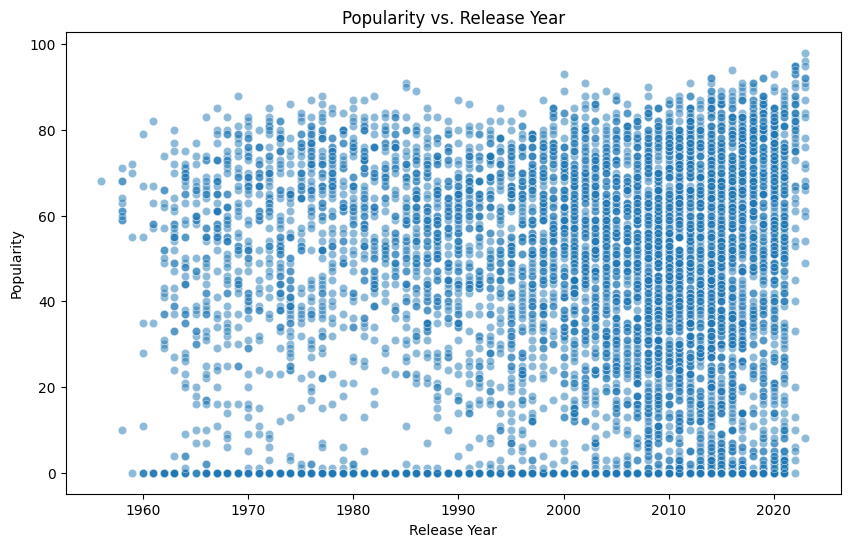

In [ ]:
# Popularity vs. Release Year
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Release Year', y='Popularity', alpha=0.5)
plt.title('Popularity vs. Release Year')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.show()

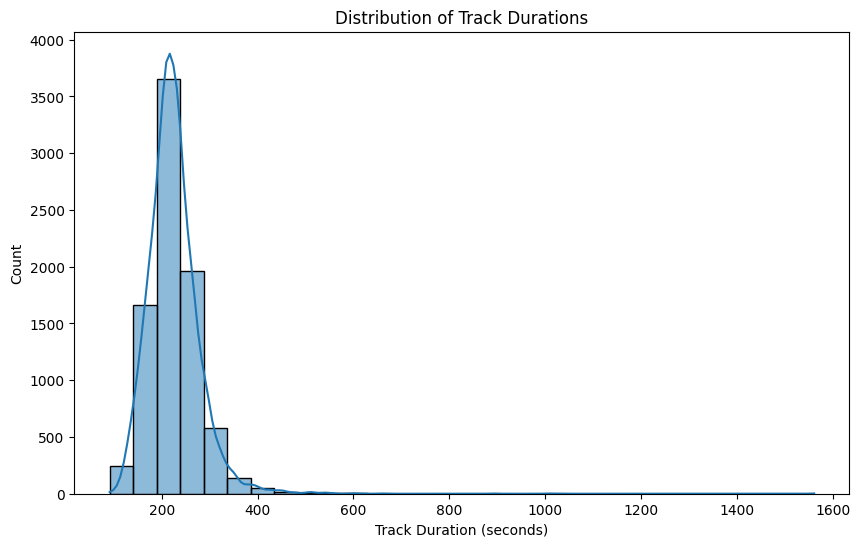

In [ ]:
# Distribution of Track Durations
plt.figure(figsize=(10, 6))
sns.histplot(df['Track Duration (ms)'] / 1000, bins=30, kde=True)
plt.title('Distribution of Track Durations')
plt.xlabel('Track Duration (seconds)')
plt.ylabel('Count')
plt.show()

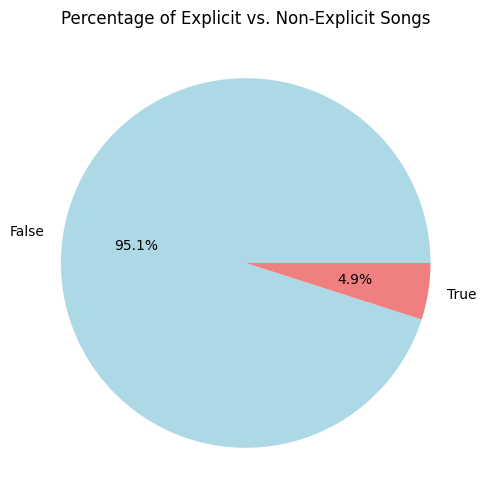

In [ ]:
# Explicit vs. Non-Explicit Songs
plt.figure(figsize=(6, 6))
df['Explicit'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Percentage of Explicit vs. Non-Explicit Songs')
plt.ylabel('')
plt.show()

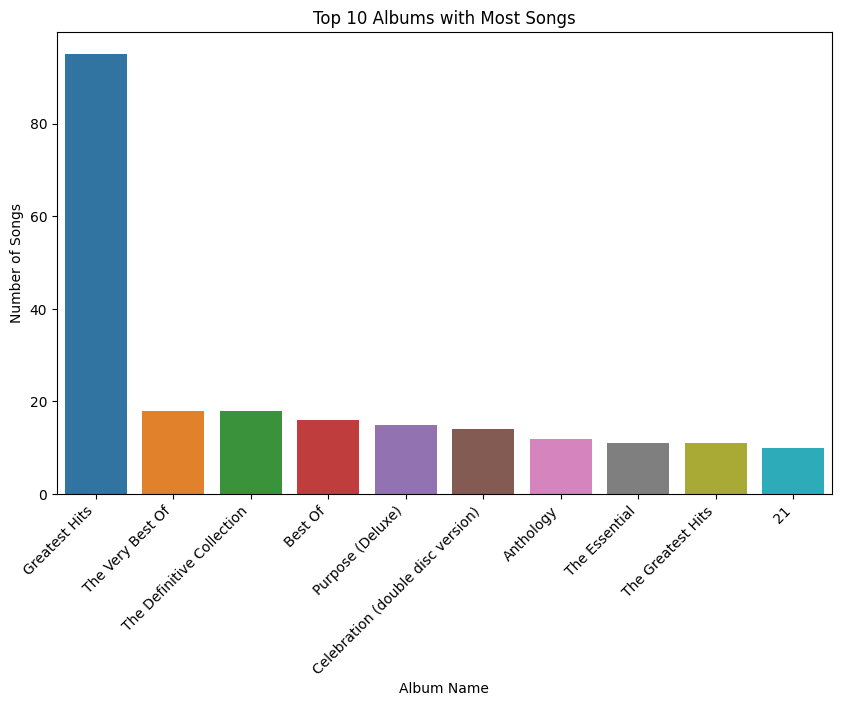

In [ ]:
# Top 10 Albums with Most Songs
top_albums = df['Album Name'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_albums.index, y=top_albums.values)
plt.title('Top 10 Albums with Most Songs')
plt.xlabel('Album Name')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')
plt.show()

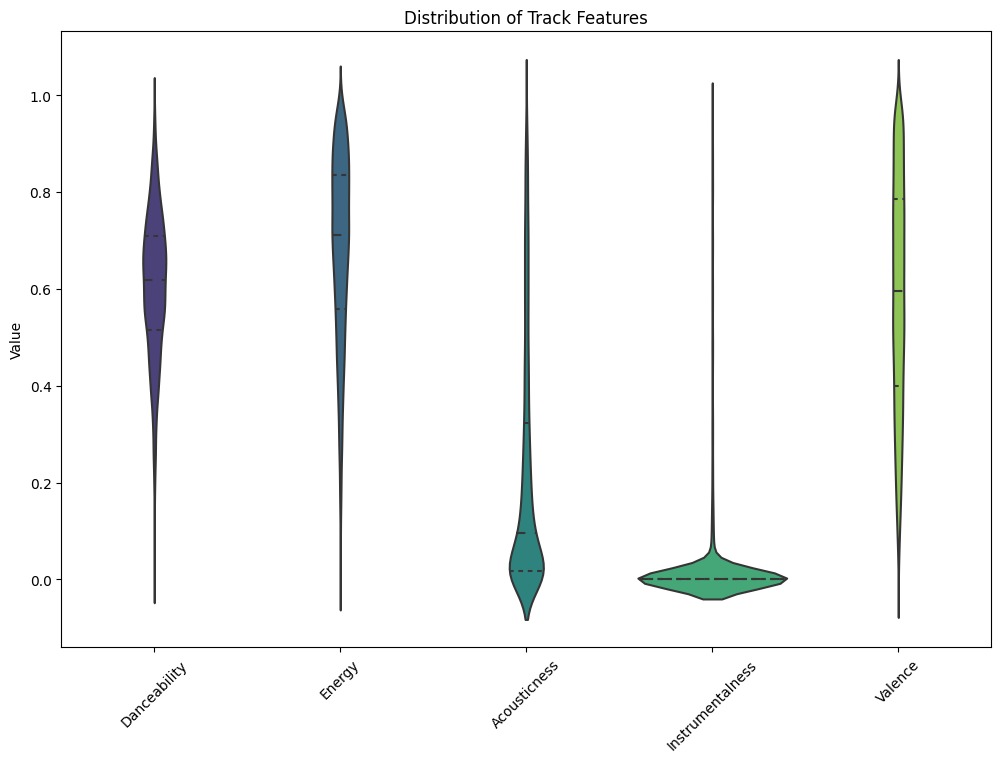

In [ ]:
# Selecting relevant features for visualization
selected_features = df[['Danceability', 'Energy', 'Acousticness', 'Instrumentalness', 'Valence']]

# Violin plots for selected track features
plt.figure(figsize=(12, 8))
sns.violinplot(data=selected_features, palette='viridis', inner='quartile')
plt.title('Distribution of Track Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Function to recommend similar songs based on track features
def recommend_similar_songs(song_name, top_n=5):
    song_features = df[df['Track Name'] == song_name][['Danceability', 'Energy', 'Valence', 'Acousticness', 'Instrumentalness']]
    if len(song_features) == 0:
        print("Song not found in the dataset.")
        return

    # Calculate the Euclidean distance between the selected song and all other songs
    distances = np.sqrt(np.sum((features_for_clustering - song_features.values[0])**2, axis=1))

    # Get the indices of the most similar songs
    similar_song_indices = np.argsort(distances)[1:top_n + 1]

    # Display the recommended similar songs
    print(f"Recommended Songs Similar to '{song_name}':")
    for idx in similar_song_indices:
        recommended_song = df.iloc[idx]['Track Name']
        print(f"- {recommended_song}")


Predicting Song Popularity using Regression


In [28]:
#Linear Regression
# Selecting relevant features for prediction
features_for_prediction = df[['Danceability', 'Energy', 'Valence', 'Acousticness', 'Instrumentalness']]

# Target variable: Popularity
target = df['Popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_for_prediction, target, test_size=0.2, random_state=42)

# Building  and training the classification model

from sklearn.linear_model import LogisticRegression

# Create the model
classifier = LogisticRegression()

# Train the model using the training data
classifier.fit(X_train, y_train)




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict popularity on the test set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r_squared}")

# Optional: Print the coefficients of the model
print("Model Coefficients:")
for feature, coefficient in zip(features_for_prediction.columns, model.coef_):
    print(f"{feature}: {coefficient}")

Mean Squared Error (MSE): 856.506969057353
R-squared (R2): 0.00152993391867573
Model Coefficients:
Danceability: 16.828855098758137
Energy: 0.7784264213497321
Valence: -5.761052593474924
Acousticness: -1.5432366053446729
Instrumentalness: -10.796376266219294


In [29]:
# Prediction and Evaluation of model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Make predictions on the test data
y_pred = classifier.predict(X_test)


In [30]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.2615476904619076


In [31]:
# Get a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.26      1.00      0.41       436
         1.0       0.00      0.00      0.00        14
         2.0       0.00      0.00      0.00         8
         3.0       0.00      0.00      0.00        14
         4.0       0.00      0.00      0.00         8
         5.0       0.00      0.00      0.00         5
         6.0       0.00      0.00      0.00         5
         7.0       0.00      0.00      0.00         6
         8.0       0.00      0.00      0.00         6
         9.0       0.00      0.00      0.00         3
        10.0       0.00      0.00      0.00         5
        11.0       0.00      0.00      0.00         4
        12.0       0.00      0.00      0.00         6
        13.0       0.00      0.00      0.00         6
        14.0       0.00      0.00      0.00         4
        15.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         8
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[436   0   0 ...   0   0   0]
 [ 14   0   0 ...   0   0   0]
 [  8   0   0 ...   0   0   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  3   0   0 ...   0   0   0]
 [  2   0   0 ...   0   0   0]]


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict popularity on the test set
y_pred_rf = rf_model.predict(X_test)

# Model evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r_squared_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest - R-squared (R2): {r_squared_rf}")

Random Forest - Mean Squared Error (MSE): 931.9786129099331
Random Forest - R-squared (R2): -0.08645087645077942


I loaded the dataset and carried out EDA for this project.
Heatmaps and scatter plots were used to visualize the dataset.
Next, preprossing was executed.

After dividing the dataset, a linear regression classifier was built, trained, and its effectiveness was assessed.

